## 4.1 身の回りにある多峰性分布

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_name = 'old_faithful'
path = os.path.join(data_name + '.txt')
xs = np.loadtxt(path)

print(xs.shape)
print(xs[:5])

(272, 2)
[[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]]


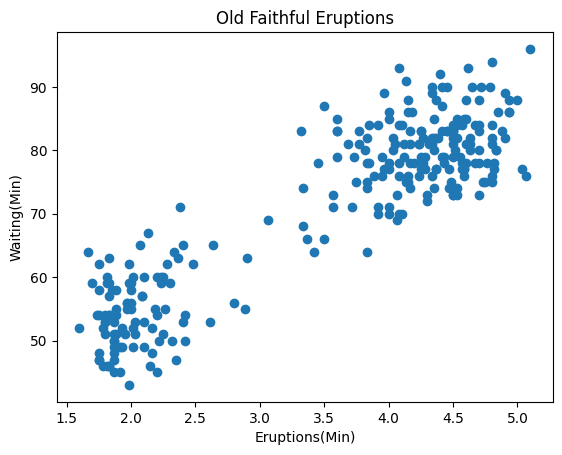

In [3]:
plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel('Eruptions(Min)') # 噴出した時間
plt.ylabel('Waiting(Min)') # 次の噴火までの待ち時間
plt.title('Old Faithful Eruptions')
plt.show()

## 4.2 混合ガウスモデルのデータ生成

In [4]:
import numpy as np

In [5]:
# ===== 学習済みのパラメータ =====
mus = np.array([[2.0, 54.5], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]], [[0.17, 0.94], [0.94, 36.0]]])
phis = np.array([0.35, 0.65])
# ==============================

def sample():
    z = np.random.choice(2, p=phis)
    mu, cov = mus[z], covs[z]
    x = np.random.multivariate_normal(mu, cov)
    return x

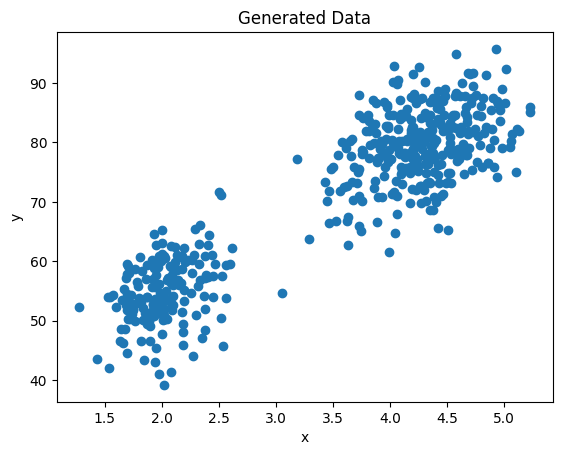

In [6]:
N = 500

xs = np.zeros((N, 2))
for n in range(N):
    xs[n] = sample()

plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

## 4.3 GMMの実装

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
mus = np.array([[2.0, 54.5], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]], [[0.17, 0.94], [0.94, 36.0]]])
phis = np.array([0.35, 0.65])

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov) # 行列式
    inv = np.linalg.inv(cov) # 逆行列
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp(-0.5*(x - mu).T @ inv @ (x - mu))
    return y

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        y += phis[k] * multivariate_normal(x, mus[k], covs[k])
    return y

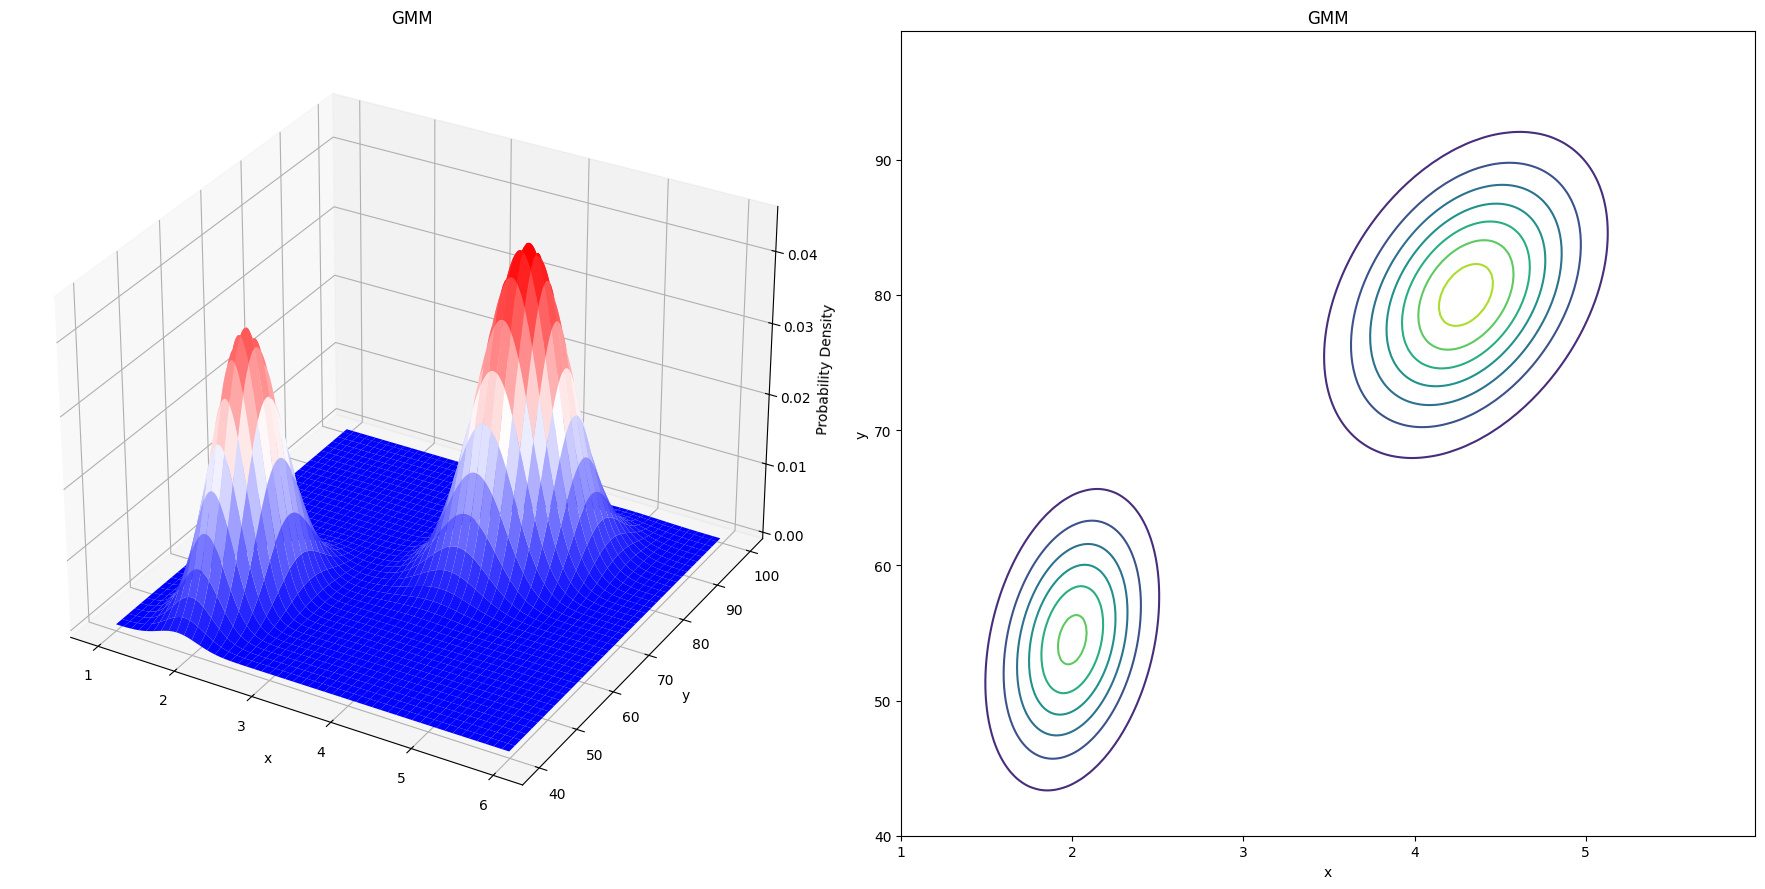

In [9]:
xs = np.arange(1, 6, 0.01)
ys = np.arange(40, 100, 0.5)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros(X.shape)

for i in range(len(xs)):
    for j in range(len(ys)):
        x = np.array([xs[i], ys[j]])
        Z[j, i] = gmm(x, phis, mus, covs)

fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='bwr')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Probability Density')
ax1.set_title('GMM')

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('GMM')

plt.tight_layout()
plt.show()